# Programming Exercise 5b: Regularized Linear Regression and Bias v.s. Variance
In this exercise we implement regularized logistic regression using skleanr and not our own defined class.

## Load and review the data

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [2]:
# Loading all data on a dictonary
data = loadmat('ex5data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()

As I will be using scikit-learn's <code>learning_curve</code>, which uses <b>k-fold cross validation</b> I am merging both <code>X</code> and <code>Xval</code>.

In [3]:
X = np.concatenate((X, Xval), axis=0)
y = np.concatenate((y, yval), axis=0)

In [4]:
# m = number of training examples
# n = number of features
# (m,n) = X.shape

Text(0, 0.5, 'Water flowing out of the dam (y)')

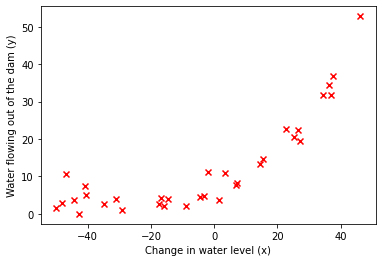

In [5]:
plt.scatter(X, y, marker='x', color='red')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

## Training the model

In [6]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

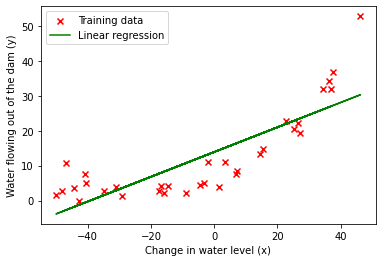

In [7]:
# Using the predict method we plot the bist fit line
plt.scatter(X, y, marker='x', color='red')
plt.plot(X, y_pred, color='green')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Training data', 'Linear regression'])

The values of $\theta$ are <code>intercept_</code> for the bias parameter and <code>coef_</code> for the rest of weight parameters.

In [8]:
lr.intercept_, lr.coef_

(13.896518034320547, array([0.35438722]))

In [9]:
lr.score(X,y)

0.6704331847326155

## Applying regularization to the linear model
We will be using the <b>Ridge Regression</b> approach, which uses the technique shown in Andrew NG's course - add the squared sum of the weights to the cost function. The weight of the bias unit is not considered!

In [10]:
lr = Ridge(alpha=1)
lr.fit(X, y)
y_pred = lr.predict(X)
lr.intercept_, lr.coef_

(13.896461225261655, array([0.35437467]))

Note that if you set <code>alpha=0</code> the result is the same than applying the <code>LinearRegression</code> method.

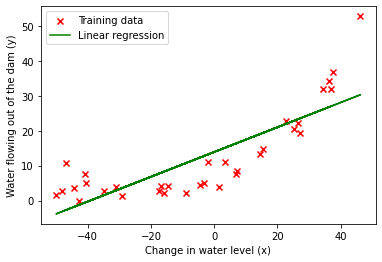

In [11]:
# Using the predict method we plot the bist fit line
plt.scatter(X, y, marker='x', color='red')
plt.plot(X, y_pred, color='green')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Training data', 'Linear regression'])

## Polynomial Regression
In order to increase the polynomial regression we are building a pipeline that increases the polinomial degree and standardises it.

In [12]:
pipe_lr = make_pipeline(PolynomialFeatures(degree=8),
                       StandardScaler(),
                       LinearRegression())
pipe_lr.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [13]:
X_fit = np.arange(-100, 100, 5)[:, np.newaxis]

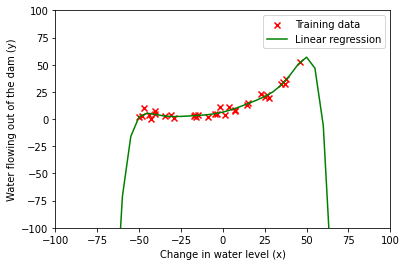

In [14]:
# Using the predict method we plot the bist fit line
plt.scatter(X, y, marker='x', color='red')
plt.plot(X_fit, pipe_lr.predict(X_fit), color='green')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Training data', 'Linear regression'])
# plt.title('Polynomial Regression with lambda={:.2f}'.format(lmbd))

In [15]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

Text(0.5, 0, 'Number of training examples')

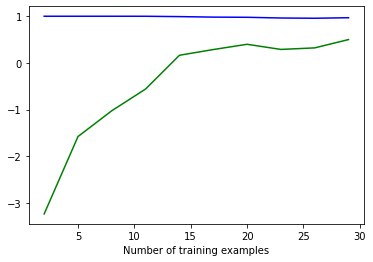

In [16]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue')
plt.plot(train_sizes, test_mean, color='green')
plt.xlabel('Number of training examples')

## Polynomial regression with regularization pipeline

### Learning Curve
To apply regularization we use <code>Ridge</code> and now we also use it to compare the model with various values of $\lambda$.
The LearningCurve is a method in scikit-learn that shows how the accuracy (<code>score</code>?) changes while the training size increases.

C:\Users\conrado.camacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.55112e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\conrado.camacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\conrado.camacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.287e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\conrado.camacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.55112e-17): result may not be accurate.
  dual_coef = linalg.sol

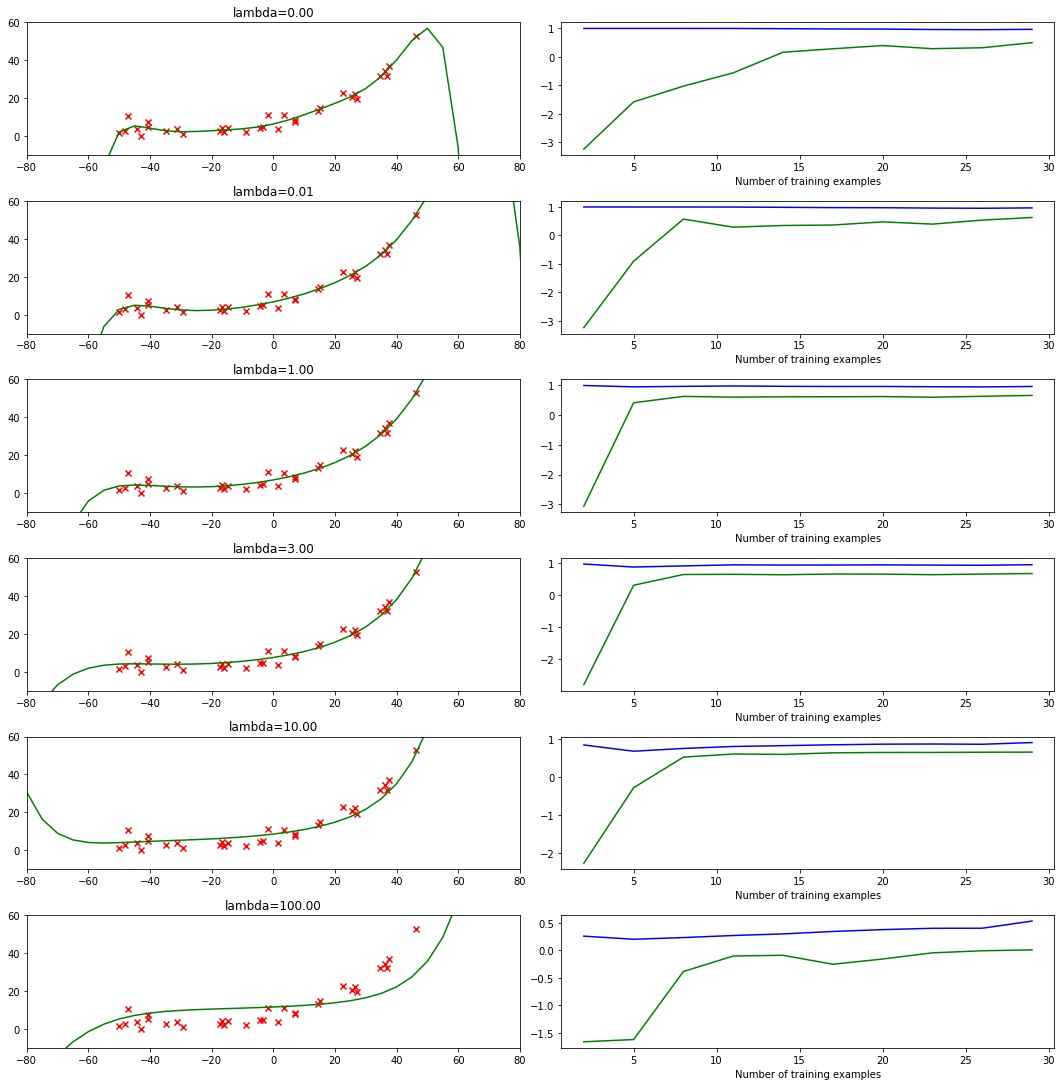

In [17]:
lmbd = [0, 0.01, 1, 3, 10, 100]
fig, ax = plt.subplots(nrows = len(lmbd), ncols = 2, sharex = False, sharey = False, figsize=(15,15))
for i, value in enumerate(lmbd):
    pipe_lr = make_pipeline(PolynomialFeatures(degree=8),
                           StandardScaler(),
                           Ridge(alpha=value))
    pipe_lr.fit(X, y)
    train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                      X=X,
                                                      y=y,
                                                      train_sizes=np.linspace(0.1, 1.0, 10),
                                                      cv=10,
                                                      n_jobs=1)
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    fig.tight_layout()
    ax[i, 0].set_title('lambda={:.2f}'.format(value))
    ax[i, 0].set_xlim(-80, 80)
    ax[i, 0].set_ylim(-10, 60)
    ax[i, 0].scatter(X, y, marker='x', color='red')
    ax[i, 0].plot(X_fit, pipe_lr.predict(X_fit), color='green')
    ax[i, 1].plot(train_sizes, train_mean, color='blue')
    ax[i, 1].plot(train_sizes, test_mean, color='green')
    ax[i, 1].set_xlabel('Number of training examples')
    
    

### Validation curve

In [18]:
pipe_lr = make_pipeline(PolynomialFeatures(degree=8),
                        StandardScaler(),
                        Ridge())
pipe_lr.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=8)),
  ('standardscaler', StandardScaler()),
  ('ridge', Ridge())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=8),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(),
 'polynomialfeatures__degree': 8,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': 'deprecated',
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

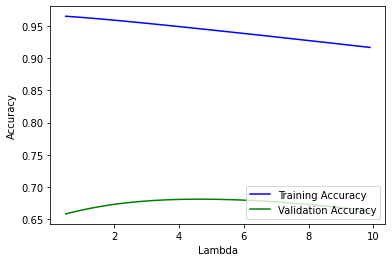

In [23]:
param_range=np.arange(0.5,10,0.1)
train_scores, test_scores = validation_curve(pipe_lr, 
                                              X,
                                              y,
                                              param_name="ridge__alpha", 
                                              param_range=param_range,
                                              cv=10)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, color='green', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.legend(loc='lower right')
plt.show()